In [1]:
#Importing Libraries
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
import pandas as pd
docs = pd.read_csv("cricket.csv",sep = ',',encoding = "ISO-8859-1", header= 0)
docs.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [3]:
columns = ['Ave','SR']
df_player = docs[['Player']]
df = docs[columns]
df.head()

,Ave,SR
0,44.83,86.23
1,41.98,78.86
2,42.03,80.39
3,32.36,91.20
4,33.37,78.96


In [4]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
norm = standard_scaler.fit_transform(df)

norm = pd.DataFrame(norm)
norm.columns = ['Ave','SR']
norm.head()

,Ave,SR
0,1.072294,0.703152
1,0.587725,-0.044139
2,0.596226,0.110997
3,-1.047909,1.207091
4,-0.876185,-0.034000


In [5]:
model_clus5 = KMeans(n_clusters = 4, random_state=100)
model_clus5.fit(norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [6]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(norm)
    sse_.append([k, silhouette_score(norm, kmeans.labels_)])

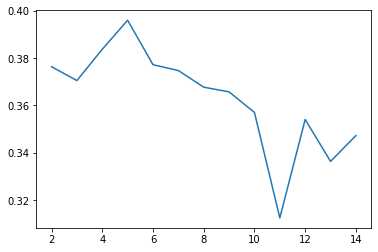

In [7]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

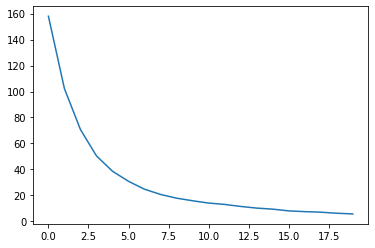

In [8]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(norm)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [9]:
RFM = pd.concat([df_player,norm ], axis=1)

In [10]:
RFM.head()

,Player,Ave,SR
0,SR Tendulkar (INDIA),1.072294,0.703152
1,KC Sangakkara (Asia/ICC/SL),0.587725,-0.044139
2,RT Ponting (AUS/ICC),0.596226,0.110997
3,ST Jayasuriya (Asia/SL),-1.047909,1.207091
4,DPMD Jayawardene (Asia/SL),-0.876185,-0.034000


In [11]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['Player', 'Ave', 'SR','ClusterID']

km_clusters_Ave = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).Ave.mean())
km_clusters_SR = 	pd.DataFrame(RFM_km.groupby(["ClusterID"]).SR.mean())

In [12]:
df = pd.concat([pd.Series([0,1,2,3]), km_clusters_Ave, km_clusters_SR], axis=1)
df.columns = ["ClusterID", "Ave_mean", "SR_mean"]
df.head()

,ClusterID,Ave_mean,SR_mean
0,0,-0.529477,1.508830
1,1,0.503468,-0.359294
2,2,-0.777680,-0.535421
3,3,1.874242,0.910338


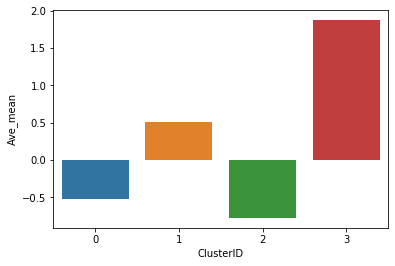

In [13]:
sns.barplot(x=df.ClusterID, y=df.Ave_mean)


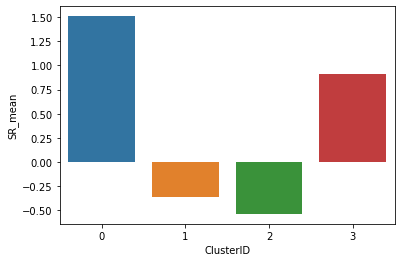

In [14]:
sns.barplot(x=df.ClusterID, y=df.SR_mean)

In [15]:
df1 = RFM[RFM['Player'].str.contains('Tendulkar') | RFM['Player'].str.contains('Yuvraj') | RFM['Player'].str.contains('Gayle') | RFM['Player'].str.contains('Jayasuriya')| RFM['Player'].str.contains('Kohli')| RFM['Player'].str.contains('Dravid')| RFM['Player'].str.contains('IVA')| RFM['Player'].str.contains('Guptil')]
print(df1)

                       Player       Ave        SR
0        SR Tendulkar (INDIA)  1.072294  0.703152
3     ST Jayasuriya (Asia/SL) -1.047909  1.207091
8   R Dravid (Asia/ICC/INDIA)  0.108256 -0.816780
17          CH Gayle (ICC/WI) -0.202889  0.589588
20  Yuvraj Singh (Asia/INDIA) -0.335508  0.849162
25            V Kohli (INDIA)  2.621216  1.185798
42          IVA Richards (WI)  1.441247  1.105695
63            MJ Guptill (NZ)  0.812157  0.855246
